## Variable Description 

person_age	Applicant's age	Float
person_gender	Applicant's gender	Categorical
person_education	Applicant's highest level of education	Categorical
person_income	Applicant's annual income in currency	Float
person_emp_exp	Years of employment experience	Integer
person_home_ownership	Home ownership status (e.g., rent, own, mortgage)	Categorical
loan_amnt	Amount of loan requested	Float
loan_intent	Intended purpose of the loan (e.g., personal, education)	Categorical
loan_int_rate	Interest rate applicable to the loan	Float
loan_percent_income	Loan amount as a percentage of annual income	Float
cb_person_cred_hist_length	Number of years of credit history	Float
credit_score	Applicant's credit score	Integer
previous_loan_defaults_on_file	Indicator of previous loan defaults (Yes/No)	Categorical
loan_status	Loan status outcome (1 = approved, 0 = rejected)	Integer

## set up and read the dataset  

In [33]:
# import the library 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.utils import resample
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score


In [9]:
df = pd.read_csv("/Users/zihualai/Desktop/Credit status and score/loan_data.csv")

## Know the data  

In [11]:
#glimpse the data
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [21]:
df.shape # 45000 records and 14 variables in total 

(45000, 14)

In [19]:
# check the basic information about variable type and NA 
df.info()      # There is no NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Columns and Data Types:

float64: person_age, person_income, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length
int64: person_emp_exp, credit_score, loan_status
object: person_gender, person_education, person_home_ownership, loan_intent, previous_loan_defaults_on_file

In [23]:
# check the statistical info 
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


1 The person_age ranges from 20 to 144, which includes potential outliers (age > 100).
2 person_income has a mean of approximately 80,319 but also shows a high maximum value (7,200,766), indicating possible income outliers.
3 loan_amnt has a median of 8,000, with a max value of 35,000.
4 credit_score has a range from 390 to 850, which is typical for credit scores.

In [25]:
df.duplicated().sum() #There is no duplicated records 

0

In [26]:
# check the unique value 
print("Unique Values in Each Column:")
print(df.nunique())

Unique Values in Each Column:
person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64


In [31]:
# show the specific unique value of the categorical variable 
print(f"Unique Values: {df['person_education'].unique()}")
print(f"Unique Values: {df['person_home_ownership'].unique()}")
print(f"unique values: {df['loan_intent'].unique()}")

Unique Values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Unique Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
unique values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


## Exploratory Data Analysis  

### For classification, target variable loan status exploration  

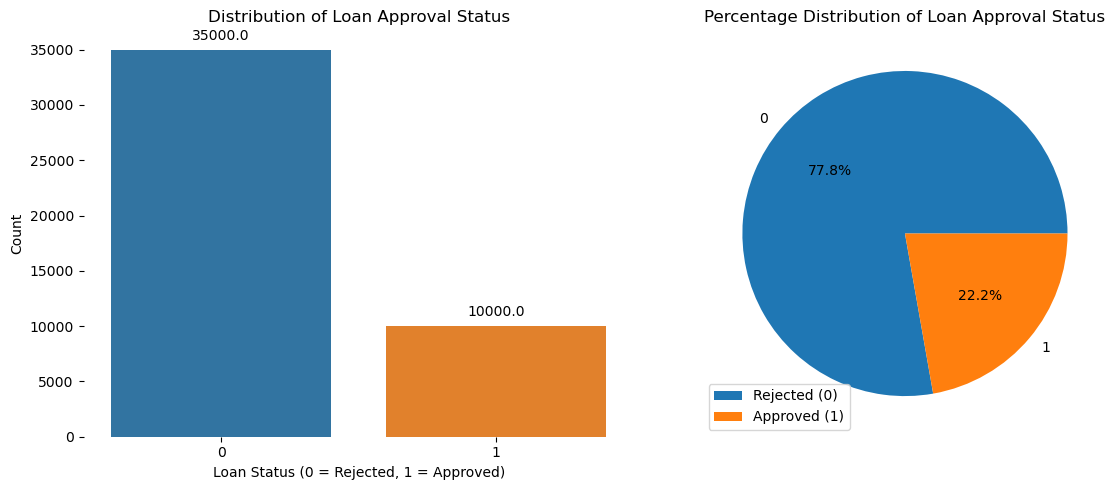

In [34]:
# Create subplots for loan status visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Count the occurrences of each loan status
loan_status_counts = df['loan_status'].value_counts()

# Bar plot for loan status distribution
sns.barplot(x=loan_status_counts.index, y=loan_status_counts, ax=axes[0], palette='tab10')
axes[0].set_title('Distribution of Loan Approval Status')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Loan Status (0 = Rejected, 1 = Approved)')

# Annotate bar plot with counts
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', 
                     xytext=(0, 10), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Pie chart for percentage distribution of loan status
loan_status_percentage = loan_status_counts / loan_status_counts.sum() * 100
axes[1].pie(loan_status_percentage, labels=loan_status_percentage.index, autopct='%1.1f%%', 
            colors=sns.color_palette('tab10'))
axes[1].set_title('Percentage Distribution of Loan Approval Status')
plt.legend(['Rejected (0)', 'Approved (1)'])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

The insights from the loan status distribution visualization:

The count annotations on top of each bar provide a clear view of the actual number of records in each category, highlighting any imbalance in the dataset.
This visualization suggests a higher count of rejected loans compared to approved ones, which may indicate a class imbalance that should be addressed when building predictive models.
The pie chart illustrates the percentage distribution of loan approval status, offering a complementary view of the relative proportions of approvals and rejections.

### Univariate Analysis for Numerical Vars  -- Histogram

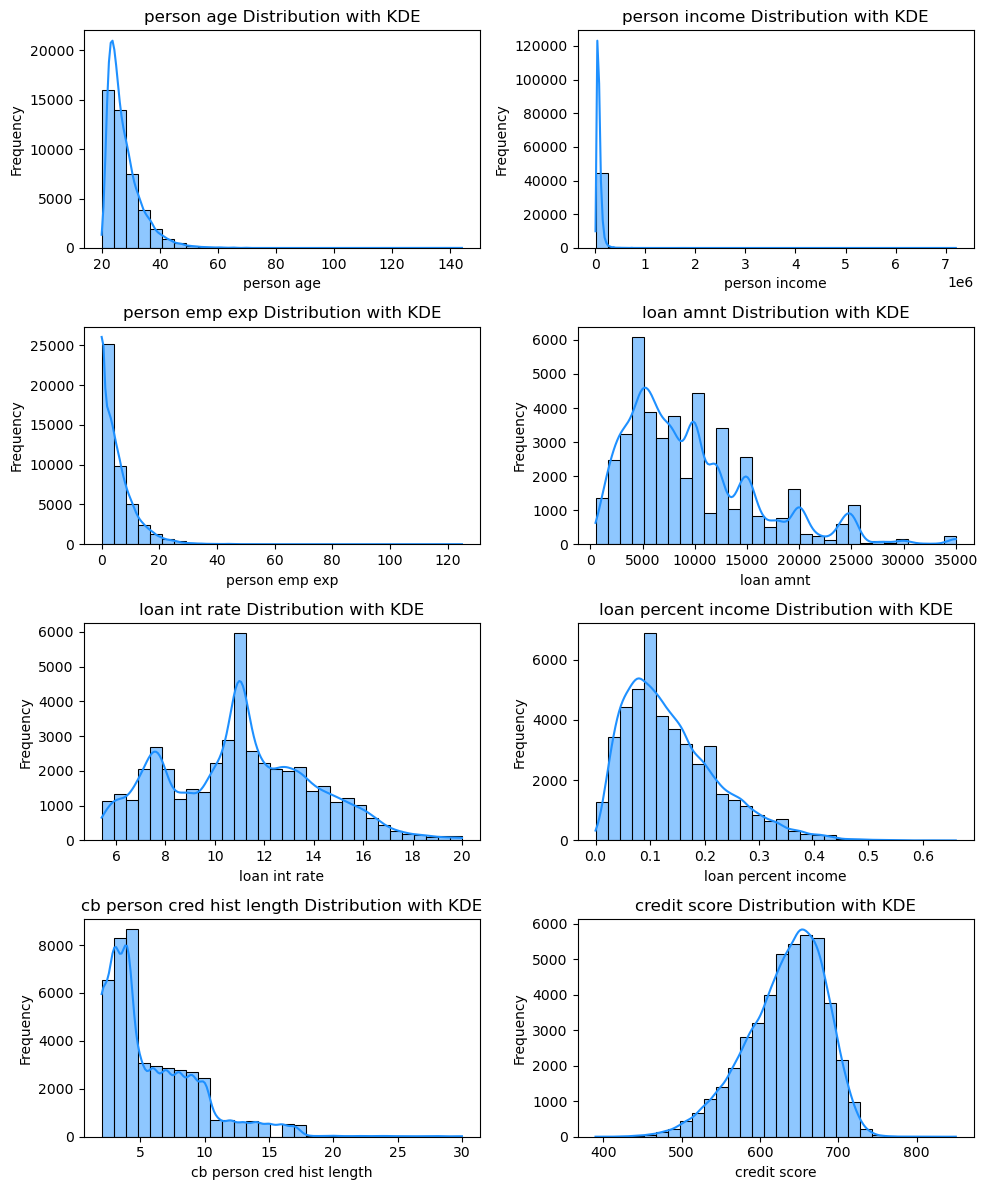

In [35]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(10, 12))  
    
    for i, column in enumerate(columns, 1):
        plt.subplot(4, 2, i)  
        sns.histplot(data[column], kde=True, bins=30, color='dodgerblue')
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

univariate_analysis(df, columns_to_analyze)

### Univariate Analysis -- Box Plot  

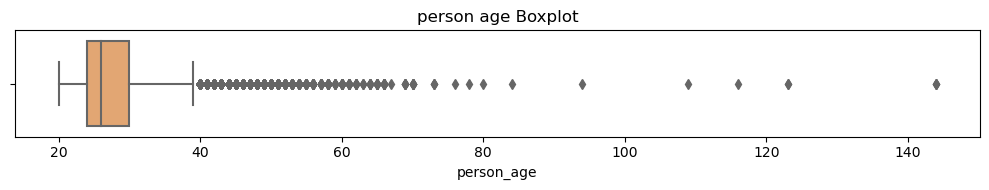


Summary Statistics for person age:
 count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64


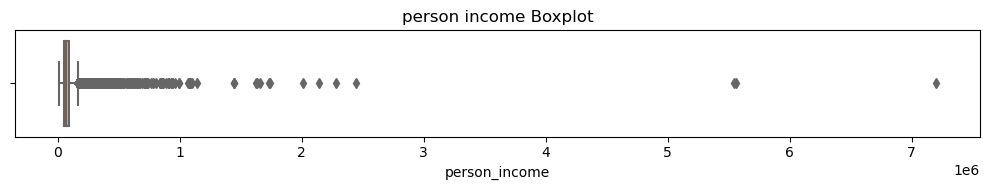


Summary Statistics for person income:
 count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64


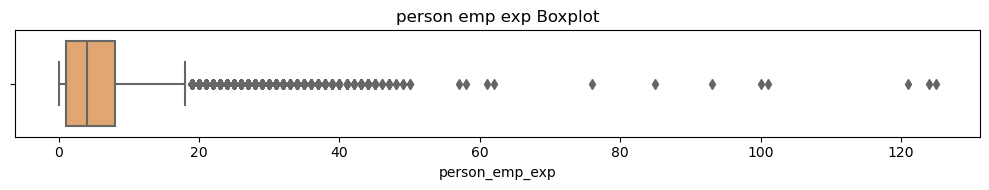


Summary Statistics for person emp exp:
 count    45000.000000
mean         5.410333
std          6.063532
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64


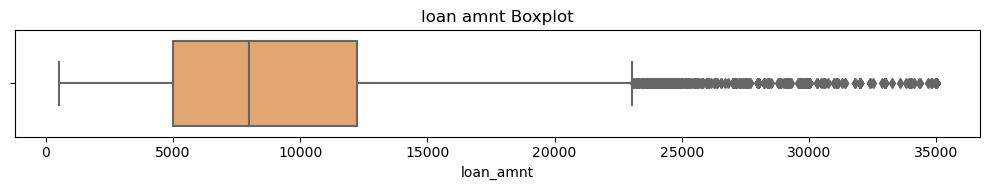


Summary Statistics for loan amnt:
 count    45000.000000
mean      9583.157556
std       6314.886691
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64


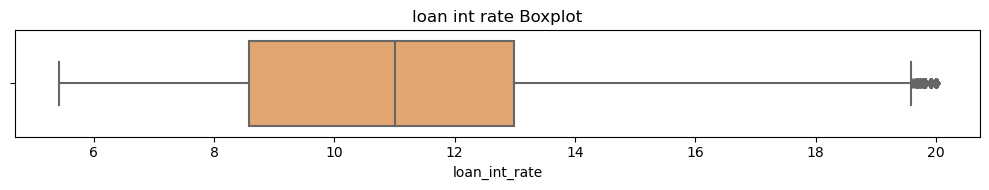


Summary Statistics for loan int rate:
 count    45000.000000
mean        11.006606
std          2.978808
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64


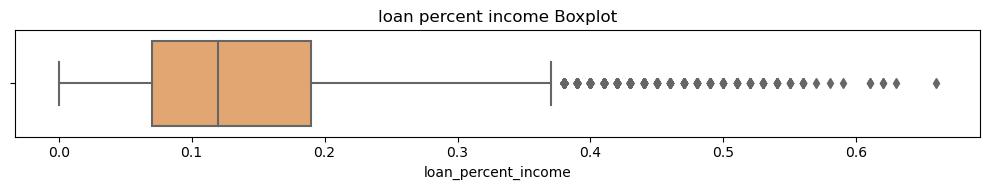


Summary Statistics for loan percent income:
 count    45000.000000
mean         0.139725
std          0.087212
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64


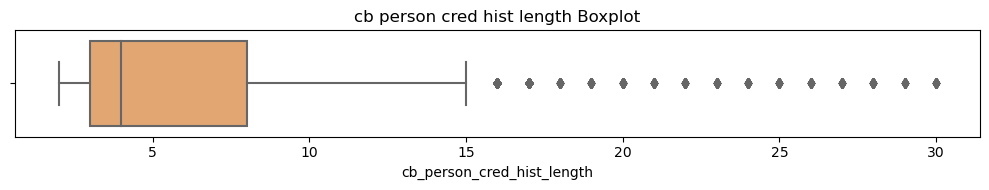


Summary Statistics for cb person cred hist length:
 count    45000.000000
mean         5.867489
std          3.879702
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64


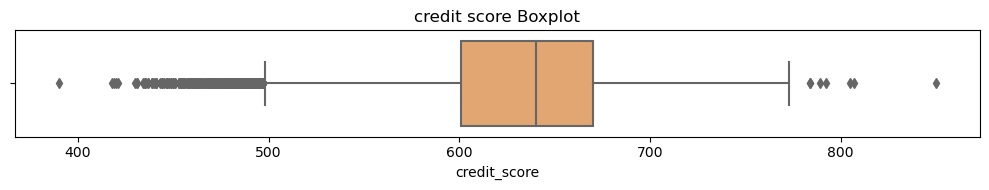


Summary Statistics for credit score:
 count    45000.000000
mean       632.608756
std         50.435865
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        850.000000
Name: credit_score, dtype: float64


In [36]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    sns.boxplot(x=data[column], color='sandybrown')
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

Person Age:

Ages range from 20 to 144, with the median age at 26. The high maximum value suggests a few outliers.
The interquartile range (IQR) is fairly narrow, with most values between 24 and 30.
Person Income:

The income distribution has a significant range, from 8,000 to over 7.2 million, with a median around 67,048.
The high maximum value indicates extreme outliers, which could potentially skew analyses and models.
Person Employment Experience:

Most values fall below 10 years, with the median at 4 years.
A maximum of 125 years is unusual, indicating outliers or data anomalies.
Loan Amount:

Loan amounts vary from 500 to 35,000, with a median of 8,000.
The distribution suggests a broad spread, with some applicants requesting higher amounts near the upper limit.
Loan Interest Rate:

Interest rates range from 5.42% to 20%, with a median rate of 11.01%.
Most rates cluster within the IQR (8.59% to 12.99%), which is typical for loan interest rates.
Loan Percent Income:

This metric ranges from 0 to 0.66, with a median of 0.12, suggesting that most loans are less than 20% of the borrower’s income.
The presence of high values near 0.66 may indicate loans that represent a higher financial burden for some applicants.
Credit History Length:

Credit history spans from 2 to 30 years, with a median of 4 years.
Most applicants have shorter credit histories, likely reflecting a younger demographic.
Credit Score:

Credit scores range from 390 to 850, with a median of 640.
The distribution appears fairly symmetric around the mean of 632, with most values falling within columns or address any anomalies.

### Categorical Variable Distribution  

In [37]:
#Define the function 
def plot_categorical_distribution(column_name, data=df):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=df, palette='muted')  
    plt.title(f'Distribution of {column_name}')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    
    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()

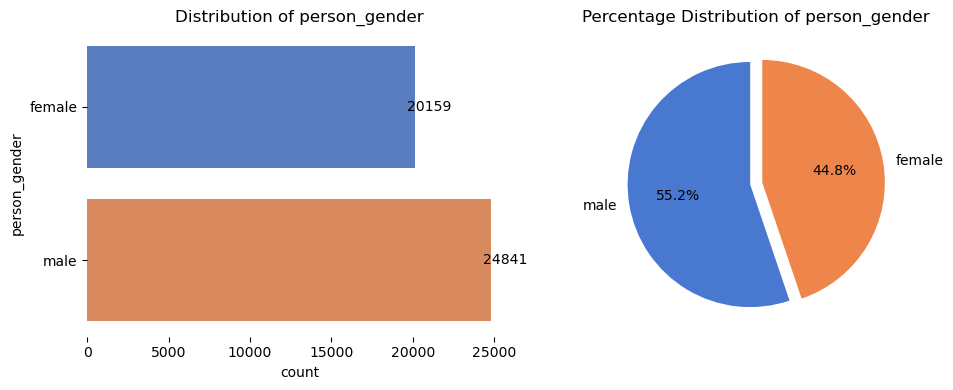

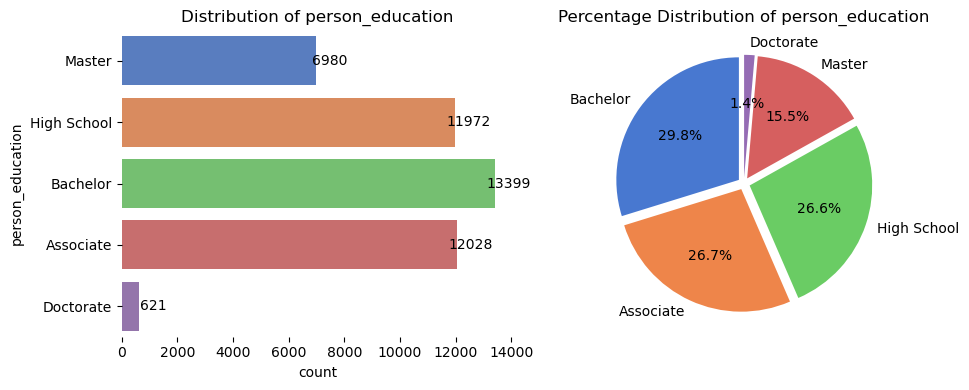

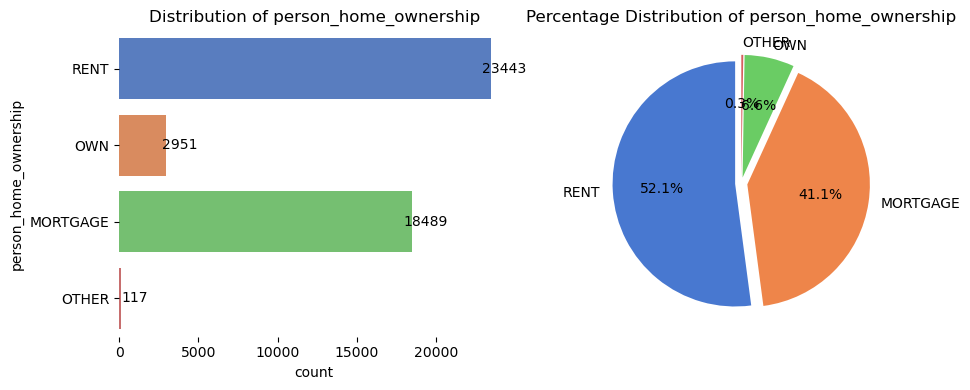

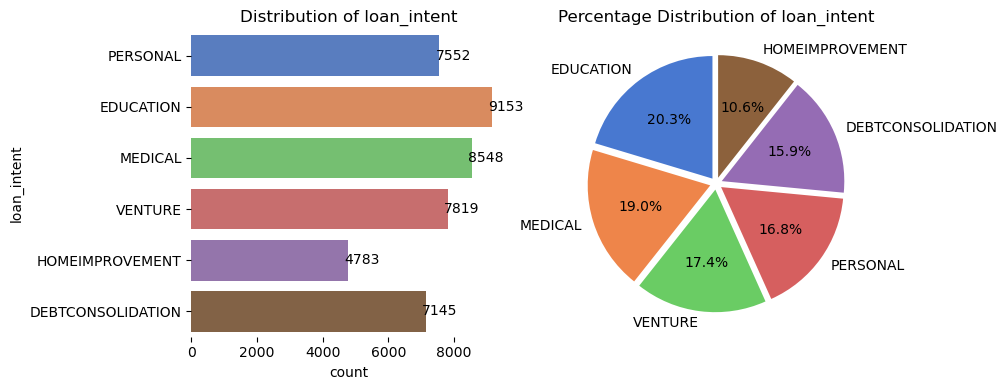

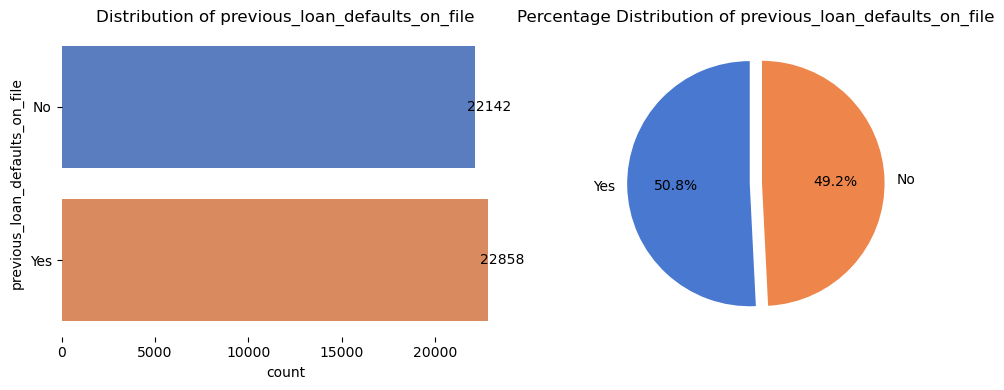

In [38]:
plot_categorical_distribution('person_gender')
plot_categorical_distribution('person_education')
plot_categorical_distribution('person_home_ownership')
plot_categorical_distribution('loan_intent')
plot_categorical_distribution('previous_loan_defaults_on_file')

Insights based on the categorical distributions:

Person Gender:

The dataset is relatively balanced in terms of gender, though there might be a slight skew toward one gender, depending on the counts.
The pie chart offers a visual summary of the proportion of each gender in the dataset.
Person Education:

Most applicants have a high school, bachelor’s, or master’s education, with fewer holding an associate or doctorate degree.
The education distribution could influence loan approval patterns, as education level often correlates with income and creditworthiness.
Person Home Ownership:

The majority of applicants either rent or own homes, with a smaller number having mortgages or classified under "other."
Applicants with different homeownership statuses may have varying financial stability, impacting their credit risk.
Loan Intent:

Loan purposes are diverse, with common intents like personal use, debt consolidation, medical expenses, and education.
The distribution reveals common reasons for seeking loans, which may impact loan approval criteria depending on risk.
Previous Loan Defaults on File:

Most applicants have no record of previous loan defaults, though there is a significant portion with defaults.
This feature can strongly influence loan decisions, as past defaults indicate higher risk.